In [ ]:
# Visão computacional - MFCC

## Impor bibliotecas 

In [ ]:
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
import matplotlib.pyplot as plt
import os.path

## Lendo audio salvos na pasta 'samples' 

In [13]:
SAMPLE_DIR = 'samples/'
files = next(os.walk(SAMPLE_DIR))[2]
files = list(files)
files

['s1_i6.wav',
 's2_i7.wav',
 's3_i7.wav',
 's3_i4.wav',
 's2_i5.wav',
 's2_i4.wav',
 's1_i5.wav',
 's2_i6.wav',
 's1_i2.wav',
 's2_i2.wav',
 's1_i1.wav',
 's3_i3.wav',
 's1_i3.wav',
 's2_i3.wav',
 's3_i9.wav',
 's2_i8.wav',
 's2_i9.wav',
 's3_i1.wav',
 's3_i5.wav',
 's1_i9.wav',
 's3_i8.wav',
 's3_i10.wav',
 's1_i10.wav',
 's3_i6.wav',
 's1_i7.wav',
 's2_i10.wav',
 's3_i2.wav',
 's1_i4.wav',
 's1_i8.wav',
 's2_i1.wav']

## Lendo audio com scipy

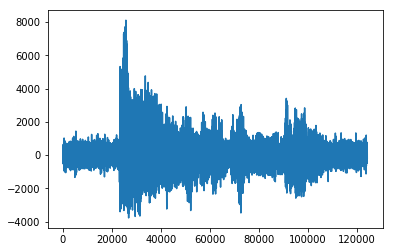

32000

In [16]:
rate, signal = scipy.io.wavfile.read(SAMPLE_DIR + files[0])
plt.plot(signal)
plt.show()
rate

## Escolhemos o tamanho do frame de 0.2 e passo de 0.1

In [21]:
frame_size = (20 / 1000) * rate
frame_advance = (10 / 1000) * rate

frame_size = int(round(frame_size))
frame_advance = int(round(frame_advance))

frame_size, frame_advance

(640, 320)

## Quantidade de frames do audio

In [23]:
num_frames = int(np.ceil(float(np.abs(signal_len - frame_size)) / frame_advance))
num_frames

386

## Realizamos o pandding (adição de zeros no sinal) para arredonda a quantidade de frames

In [26]:
pad_signal_length = num_frames * frame_advance + frame_size
z = np.zeros((int(pad_signal_length) - signal_len))
pad_signal = np.append(signal, z)
pad_signal, z

(array([-267., -225., -187., ..., -152., -152., -194.]),
 array([], dtype=float64))

## Exibindo a janela de hamming

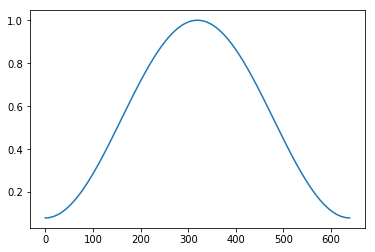

In [29]:
plt.plot(np.hamming(frame_size))
plt.show()

## Aplicamos a janela sobre o cada frame da imagem

In [33]:
indices = np.tile(np.arange(0, frame_size), (num_frames, 1)) + np.tile(
    np.arange(0, num_frames * frame_advance, frame_advance), (frame_size, 1)).T
frames = pad_signal[indices.astype(np.int32, copy=False)]
frames *= np.hamming(frame_size)
frames

array([[-21.36      , -18.0050034 , -14.97663311, ...,  21.62401572,
         24.56682686,  29.76      ],
       [  1.68      ,   7.84217926,  10.01111839, ...,  20.18241467,
         19.68547038,  13.76      ],
       [ 37.04      ,  44.49236395,  53.89986141, ..., -44.68963249,
        -41.69158564, -36.96      ],
       ..., 
       [  4.8       ,   8.64240163,  12.89432049, ...,  18.58063573,
         26.56738279,  28.4       ],
       [  0.08      ,  -3.84106739,  -3.44382473, ...,  -2.24249052,
         -8.96249058, -17.44      ],
       [ 31.68      ,  25.92720489,  12.25360891, ...,  -1.28142315,
         -6.48180122, -11.68      ]])

# Gerando banco de filtos

## Definindo valores padrões -> Num de filtros, samples da nfft e quantidade de ceptrais

In [36]:
nfft = 2048
cep = 12
num_filters = 40

## Vamos gerar os filtros de frequência de acordo com o trabalho sugerido por Sanderson

In [34]:
sanderson_filters = np.array([200, 300, 400, 500, 600, 700, 800, 900, 1000, 1149, 1320, 1516, 1741, 2000, 2297, 2639, 3031, 3482, 4000])


## Vamos listar apenas as frequências centrais (200hz é a freq inicial e 4000 é a final)

In [40]:
central_freqs = sanderson_filters[1:-1] # Remove o inicial e final, mantendo apenas os centrais
central_freqs

array([ 300,  400,  500,  600,  700,  800,  900, 1000, 1149, 1320, 1516,
       1741, 2000, 2297, 2639, 3031, 3482])

## Calcular onde começa e termina cada filtro

In [41]:
nfilt = len(central_freqs)
bin = np.floor((nfft + 1) * sanderson_filters / rate)
bin

array([  12.,   19.,   25.,   32.,   38.,   44.,   51.,   57.,   64.,
         73.,   84.,   97.,  111.,  128.,  147.,  168.,  194.,  222.,  256.])

## Calcular banco de filtros

In [43]:
fbank = np.zeros((nfilt, int(np.floor(nfft / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])  # inicial
    f_m = int(bin[m])  # central
    f_m_plus = int(bin[m + 1])  # final

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
fbank

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

## Desenhando os filtros

/home/alano/.virtualenvs/visao_computacional/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


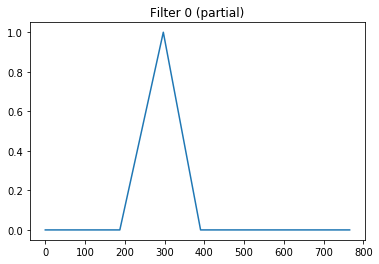

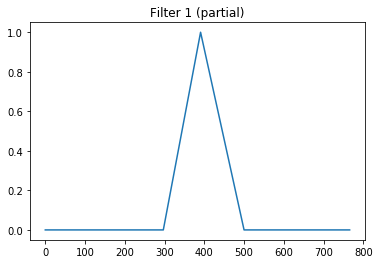

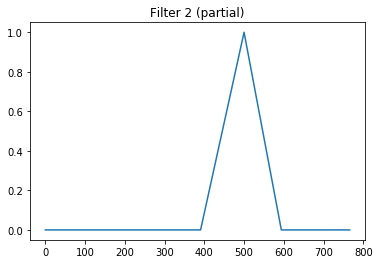

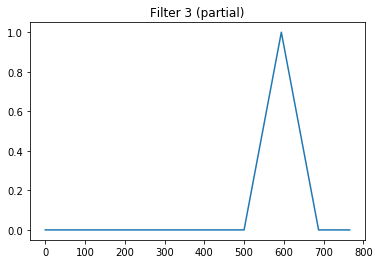

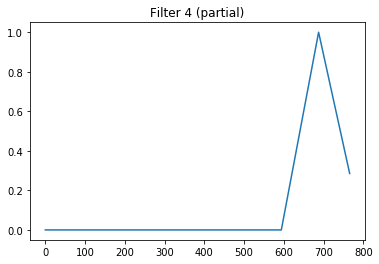

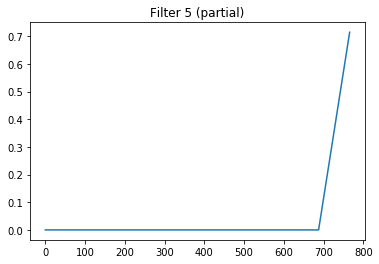

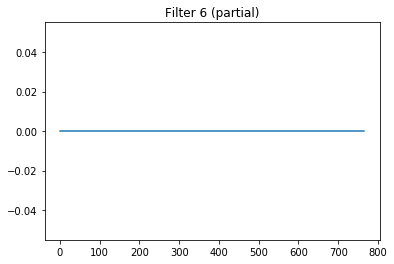

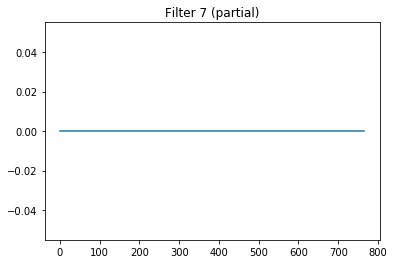

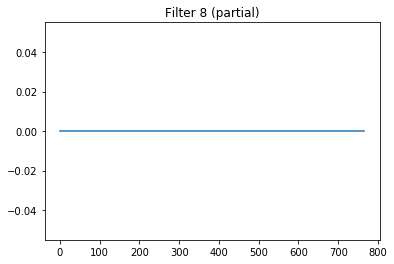

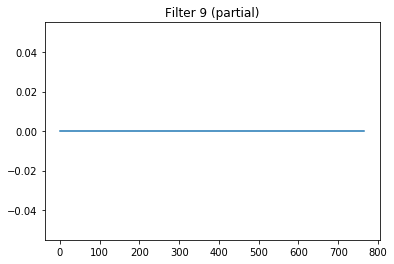

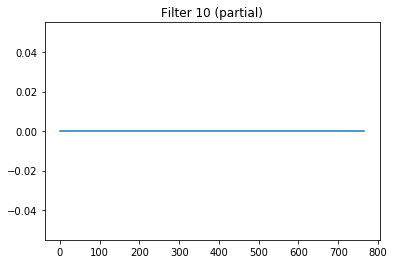

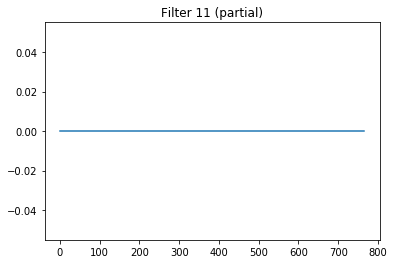

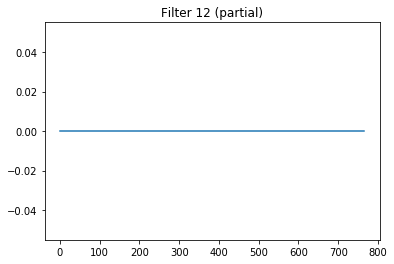

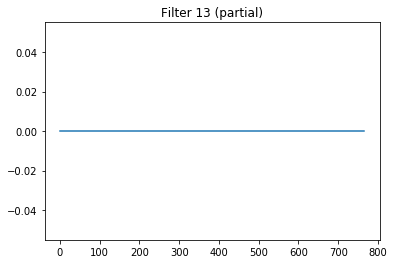

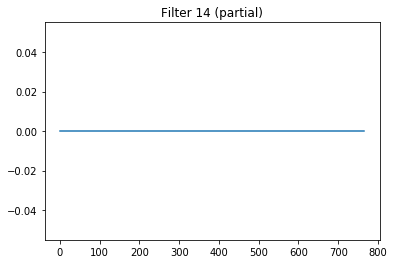

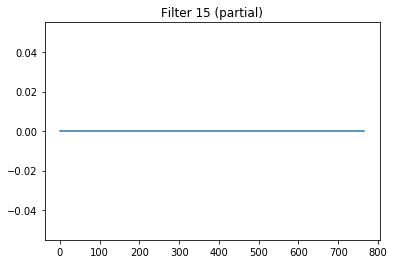

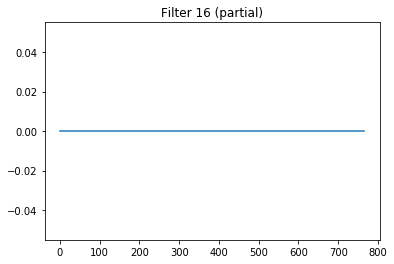

In [45]:
f = np.linspace(0, rate / 2, np.ceil((nfft + 1) / 2))
for idx in range(0, len(fbank)):
    plt.figure(idx)
    plt.title('Filter %d (partial)' % idx)
    plt.plot(f[0:50], fbank[idx][0:50])
plt.show()